In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


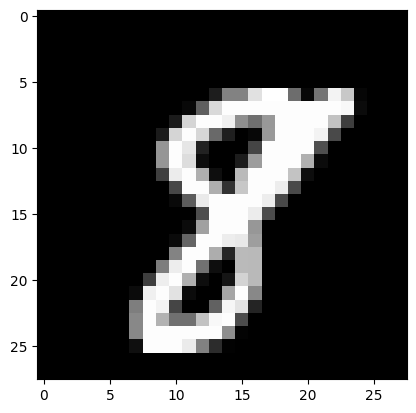

Label:  8
Max value:  255


In [ ]:
sample_id = 55
plt.imshow(x_train[sample_id], cmap="gray")
plt.show()
print("Label: ", y_train[sample_id])
print("Max value: ", np.max(x_train[sample_id]))

In [ ]:
num_classes = 10

x_train = x_train / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)

x_test = x_test / 255.0
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

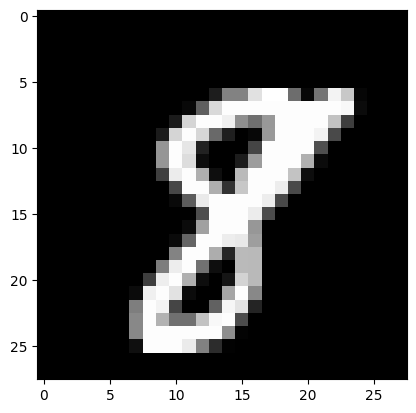

Label:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Max value:  1.0


In [ ]:
plt.imshow(x_train[sample_id], cmap="gray")
plt.show()
print("Label: ", y_train[sample_id])
print("Max value: ", np.max(x_train[sample_id]))

In [ ]:
#converting 2D image to 3D volume

x_train = np.expand_dims(x_train, axis=3) # (28, 28) -> (28, 28, 1)
x_test = np.expand_dims(x_test, axis=3) # (28, 28) -> (28, 28, 1)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [ ]:
img_rows, img_cols = 28, 28
num_channels = 1
input_shape = (img_rows, img_cols, num_channels)

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(16, (5, 5), strides=(1, 1), activation='relu', input_shape=input_shape))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=25, verbose=1, validation_data=(x_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 9s 3ms/step - loss: 0.4551 - accuracy: 0.8736 - val_loss: 0.2101 - val_accuracy: 0.9396
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1876 - accuracy: 0.9453 - val_loss: 0.1439 - val_accuracy: 0.9578
Epoch 3/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1306 - accuracy: 0.9626 - val_loss: 0.1011 - val_accuracy: 0.9705
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1027 - accuracy: 0.9698 - val_loss: 0.0897 - val_accuracy: 0.9729
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0852 - accuracy: 0.9754 - val_loss: 0.0742 - val_accuracy: 0.9765
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0736 - accuracy: 0.9786 - val_loss: 0.0660 - val_accuracy: 0.9797
Epoch 7/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0658 - accuracy: 0.9806 - val_loss: 0.0604 - val_accuracy:

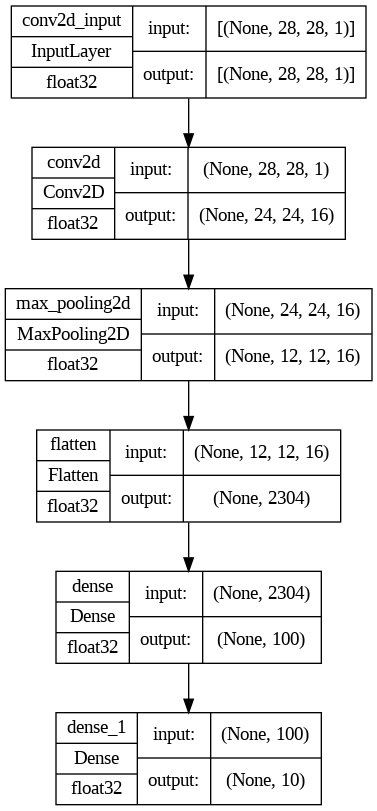

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 100)               230500    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 231926 (905.96 KB)
Trainable params: 231926 (905.96 KB)
Non-trainable params: 0 (0.00 Byte)
________________